# Table of Contents

#### 1. Import Libraries and data
#### 2. Review data shape, structure, and basic statistics
#### 3. Data Cleaning
        3.1: Missing Values
        3.2: Duplicate Values
        3.3: Mixed type data
        3.4: Finding and reviewing outliers
        3.5: Updating outliers
#### 4. Frequency Distributions
        4.1: Region
        4.2: Soil Type
        4.3: Crop
        4.4: Weather Condition
        4.5: Rainfall_mm
        4.6: Temperature_Celsius
        4.7: Days to Harvest
        4.8: Yield_tons_per_hectare
        4.9: Fertilizer used
        4.10: Irrigation used
#### 5. Observations
#### 6. Export Data

## 1. Import libraries and data

In [6]:
# importing libraries
import pandas as pd 
import numpy as np 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [7]:
# create shortcut path
path = r"C:\Users\HP\Documents\09-2024 Agriculture Crop Analysis"

In [8]:
# import datasets
df_crop = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'crop_yield.csv'), index_col = False)

## 2. Data exploration

In [10]:
df_crop.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


In [11]:
df_crop.tail()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
999995,West,Silt,Rice,302.805345,27.987428,False,False,Sunny,76,1.347586
999996,South,Chalky,Barley,932.991383,39.661039,True,False,Rainy,93,7.311594
999997,North,Peaty,Cotton,867.362046,24.370042,True,False,Cloudy,108,5.763182
999998,West,Silt,Wheat,492.812857,33.045505,False,False,Sunny,102,2.070159
999999,West,Sandy,Maize,180.936180,27.298847,True,False,Sunny,76,2.937243


In [12]:
df_crop.shape

(1000000, 10)

In [13]:
df_crop.dtypes

Region                     object
Soil_Type                  object
Crop                       object
Rainfall_mm               float64
Temperature_Celsius       float64
Fertilizer_Used              bool
Irrigation_Used              bool
Weather_Condition          object
Days_to_Harvest             int64
Yield_tons_per_hectare    float64
dtype: object

In [14]:
# viewing basic statistics
df_crop.describe()

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,549.981901,27.504965,104.495025,4.649472
std,259.851320,7.220608,25.953412,1.696572
min,100.000896,15.000034,60.000000,-1.147613
25%,324.891090,21.254502,82.000000,3.417637
50%,550.124061,27.507365,104.000000,4.651808
75%,774.738520,33.753267,127.000000,5.879200
max,999.998098,39.999997,149.000000,9.963372


The variable that stands out to me is the minimum value for Yield_tons_per_hectare. For the remainder of the dataset, the mean and 50% values are very similar, meaning that most of the other distributions are evenly spaced. This could make for a more straightforward analysis, but present real-world limitations.

## 3. Data Cleaning

In [17]:
#  3.1 check for missing values
missing_values = df_crop.isnull().sum()

# 3.2 check for duplicates
duplicate_rows = df_crop.duplicated().sum()

missing_values, duplicate_rows

(Region                    0
 Soil_Type                 0
 Crop                      0
 Rainfall_mm               0
 Temperature_Celsius       0
 Fertilizer_Used           0
 Irrigation_Used           0
 Weather_Condition         0
 Days_to_Harvest           0
 Yield_tons_per_hectare    0
 dtype: int64,
 0)

No missing values or duplicate rows in the set.

In [19]:
# 3.3 check for mixed-type data
for col in df_crop.columns.tolist():
  weird = (df_crop[[col]].map(type) != df_crop[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_crop[weird]) > 0:
      print(col)
else : print("no mixed-type data")

no mixed-type data


No mixed type data in the set.

In [21]:
# 3.4 finding outliers in 'Yield_tons_per_hectare'

# calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_crop['Yield_tons_per_hectare'].quantile(0.25)
Q3 = df_crop['Yield_tons_per_hectare'].quantile(0.75)
IQR = Q3 - Q1

# define the bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# find outliers
outliers = df_crop[(df_crop['Yield_tons_per_hectare'] < lower_bound) | (df_crop['Yield_tons_per_hectare'] > upper_bound)]
print(outliers)

       Region Soil_Type     Crop  Rainfall_mm  Temperature_Celsius  \
11596    West     Peaty    Wheat   957.380991            36.324216   
39669    East      Loam   Barley   147.755191            20.390486   
54745   North     Peaty   Barley   119.136310            15.984143   
77504    West     Sandy    Wheat   120.422223            22.809881   
93760    West      Clay  Soybean   108.811480            17.936402   
...       ...       ...      ...          ...                  ...   
942403  South      Silt    Maize   987.281001            23.821032   
947118  North      Clay   Cotton   110.727929            23.191667   
949892  North      Silt  Soybean   107.476604            15.473496   
966078  South    Chalky    Wheat   948.730680            38.383078   
975666  South      Clay   Barley   116.114046            16.257818   

        Fertilizer_Used  Irrigation_Used Weather_Condition  Days_to_Harvest  \
11596              True             True             Sunny               73   
3

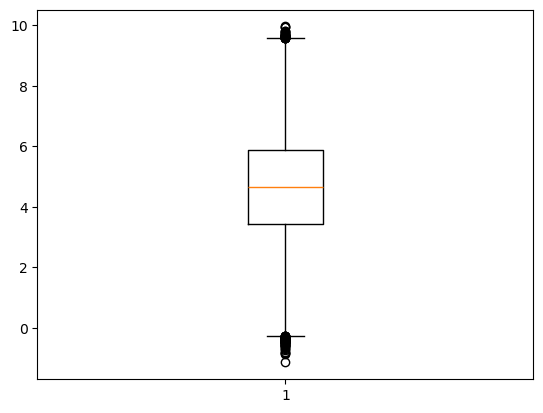

In [22]:
# create a boxplot
plt.boxplot(df_crop['Yield_tons_per_hectare'])
plt.show()

I have decided to update the negative values to 0 and leave the upper bound outliers as is.

In [24]:
# returning negative ' Yield_tons_per_hectare' values
negative_outliers = df_crop[df_crop['Yield_tons_per_hectare'] < 0]
print(negative_outliers)

       Region Soil_Type     Crop  Rainfall_mm  Temperature_Celsius  \
756      East     Peaty   Cotton   101.019421            33.804131   
7799    South    Chalky     Rice   108.804894            18.004082   
8421     East    Chalky  Soybean   168.120735            38.473430   
9553    North      Silt    Wheat   156.607973            16.610257   
15435   South    Chalky    Maize   177.481344            27.719742   
...       ...       ...      ...          ...                  ...   
975666  South      Clay   Barley   116.114046            16.257818   
982738   West      Loam    Wheat   235.792353            31.699429   
987054   West     Peaty   Barley   100.467398            15.735951   
995837   East    Chalky    Maize   105.575189            15.864764   
998040  North    Chalky    Maize   184.671094            29.176601   

        Fertilizer_Used  Irrigation_Used Weather_Condition  Days_to_Harvest  \
756               False            False             Rainy              117   
7

There are 231 rows with negative values in the yield column.

In [26]:
# 3.5 Updating negative values to 0
# Create a copy of the original dataset
df_crop_clean = df_crop.copy()

# Replace negative values in the 'Yield_tons_per_hectare' column with 0 in the new dataset
df_crop_clean.loc[df_crop_clean['Yield_tons_per_hectare'] < 0, 'Yield_tons_per_hectare'] = 0

In [27]:
df_crop_clean.describe()

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,549.981901,27.504965,104.495025,4.649518
std,259.851320,7.220608,25.953412,1.696443
min,100.000896,15.000034,60.000000,0.000000
25%,324.891090,21.254502,82.000000,3.417637
50%,550.124061,27.507365,104.000000,4.651808
75%,774.738520,33.753267,127.000000,5.879200
max,999.998098,39.999997,149.000000,9.963372


In [28]:
# validating negative yields were removed
negative_outliers_2 = df_crop_clean[df_crop_clean['Yield_tons_per_hectare'] < 0]
negative_outliers_2

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare


I can validate that the new dataset has the negative values converted to 0 by seeing that the min is 0, not a negative.

## 4. Frequency Distributions

In [31]:
# 4.1 viewing distribution of regions
df_crop_clean['Region'].value_counts(dropna = False)

Region
North    250173
West     250074
South    250054
East     249699
Name: count, dtype: int64

Text(0, 0.5, 'Count')

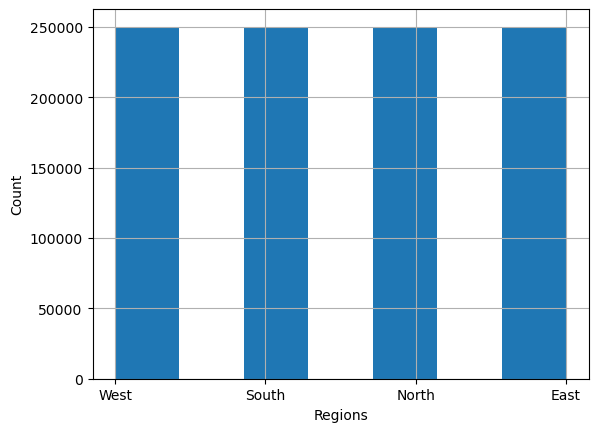

In [32]:
df_crop_clean['Region'].hist(bins = 7)
plt.xlabel('Regions')
plt.ylabel('Count')

In [33]:
# 4.2 viewing distribution of soil type
df_crop_clean['Soil_Type'].value_counts(dropna = False)

Soil_Type
Sandy     167119
Loam      166795
Chalky    166779
Silt      166672
Clay      166352
Peaty     166283
Name: count, dtype: int64

Text(0, 0.5, 'Count')

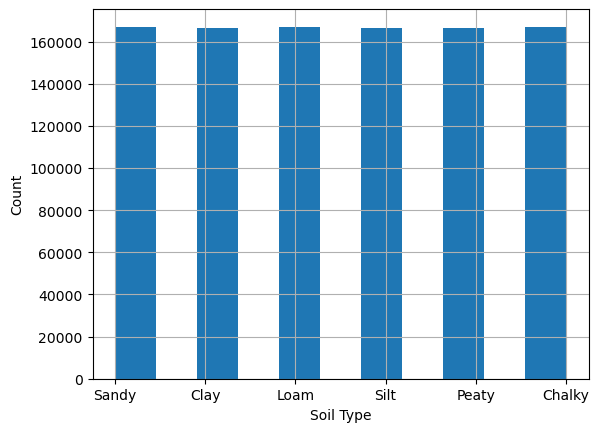

In [34]:
df_crop_clean['Soil_Type'].hist(bins = 11)
plt.xlabel('Soil Type')
plt.ylabel('Count')

In [35]:
# 4.3 viewing distribution of crop
df_crop_clean['Crop'].value_counts(dropna = False)

Crop
Maize      166824
Rice       166792
Barley     166777
Wheat      166673
Cotton     166585
Soybean    166349
Name: count, dtype: int64

Text(0, 0.5, 'Count')

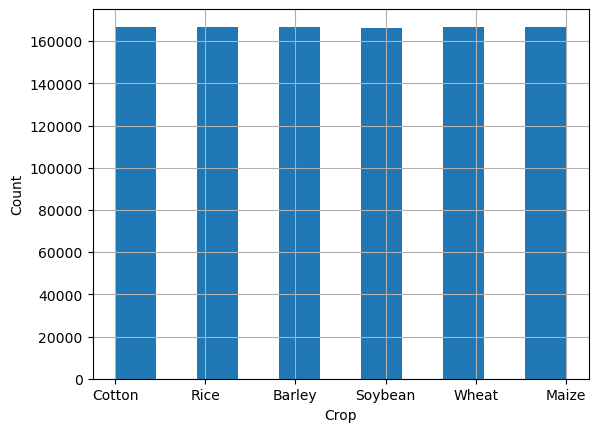

In [36]:
df_crop_clean['Crop'].hist(bins = 11)
plt.xlabel('Crop')
plt.ylabel('Count')

In [37]:
# 4.4 viewing distribution of weather condition
df_crop_clean['Weather_Condition'].value_counts(dropna = False)

Weather_Condition
Sunny     333790
Rainy     333561
Cloudy    332649
Name: count, dtype: int64

Text(0, 0.5, 'Count')

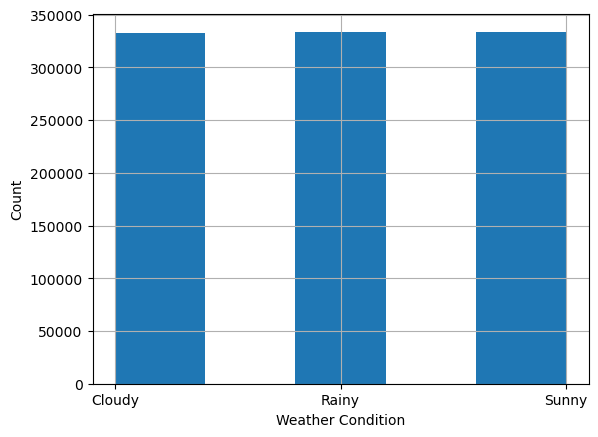

In [38]:
df_crop_clean['Weather_Condition'].hist(bins = 5)
plt.xlabel('Weather Condition')
plt.ylabel('Count')

In [39]:
# 4.5 viewing distribution of rainfall
df_crop_clean['Rainfall_mm'].value_counts(dropna = False)

Rainfall_mm
897.077239    1
928.488327    1
851.685194    1
157.345005    1
947.940721    1
             ..
450.217517    1
139.847365    1
697.820992    1
199.891636    1
180.936180    1
Name: count, Length: 1000000, dtype: int64

Text(0, 0.5, 'Count')

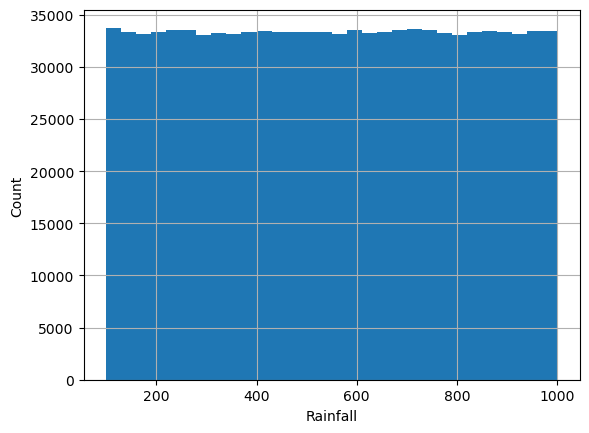

In [40]:
df_crop_clean['Rainfall_mm'].hist(bins = 30)
plt.xlabel('Rainfall')
plt.ylabel('Count')

In [41]:
# 4.6 viewing distribution of temperature
df_crop_clean['Temperature_Celsius'].value_counts(dropna = False)

Temperature_Celsius
27.676966    1
21.029815    1
27.187125    1
27.615359    1
32.270093    1
            ..
32.338564    1
16.615633    1
27.174165    1
37.504912    1
27.298847    1
Name: count, Length: 1000000, dtype: int64

Text(0, 0.5, 'Count')

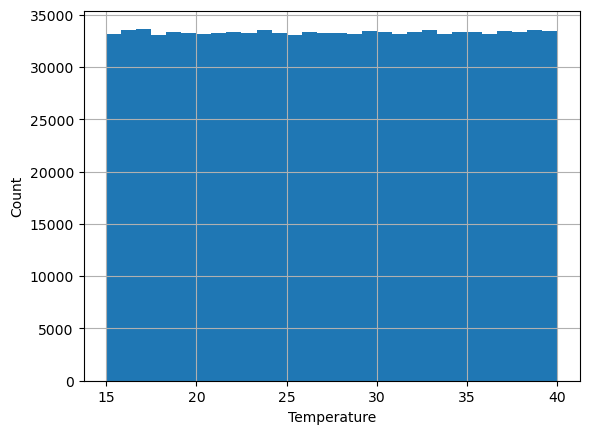

In [42]:
df_crop_clean['Temperature_Celsius'].hist(bins = 30)
plt.xlabel('Temperature')
plt.ylabel('Count')

In [43]:
# 4.7 viewing distribution of days to harvest
df_crop_clean['Days_to_Harvest'].value_counts(dropna = False)

Days_to_Harvest
91     11417
122    11326
72     11295
102    11259
114    11251
       ...  
134    10954
139    10951
131    10940
67     10921
149    10864
Name: count, Length: 90, dtype: int64

Text(0, 0.5, 'Count')

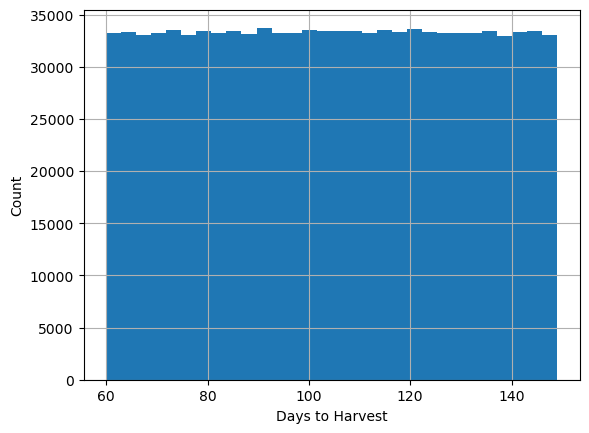

In [44]:
df_crop['Days_to_Harvest'].hist(bins = 30)
plt.xlabel('Days to Harvest')
plt.ylabel('Count')

In [45]:
# 4.8 viewing distribution of yield
df_crop_clean['Yield_tons_per_hectare'].value_counts(dropna = False)

Yield_tons_per_hectare
0.000000    231
6.555816      1
3.517813      1
6.915861      1
2.894459      1
           ... 
5.372418      1
4.968496      1
4.443734      1
2.721955      1
2.937243      1
Name: count, Length: 999770, dtype: int64

Text(0, 0.5, 'Count')

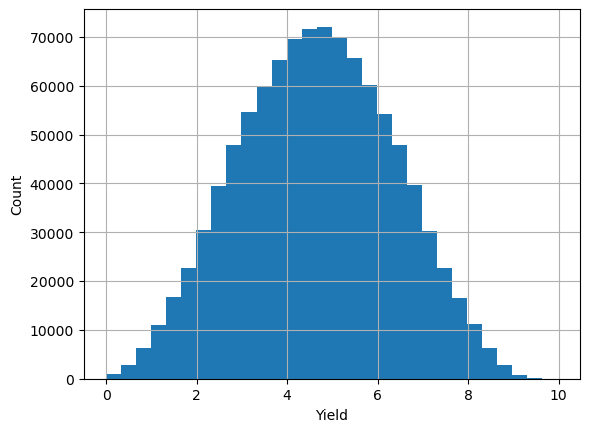

In [46]:
df_crop_clean['Yield_tons_per_hectare'].hist(bins = 30)
plt.xlabel('Yield')
plt.ylabel('Count')

In [47]:
# 4.9 viewing distribution of fertilizer used
df_crop_clean['Fertilizer_Used'].value_counts(dropna = False)

Fertilizer_Used
False    500060
True     499940
Name: count, dtype: int64

Text(0, 0.5, '')

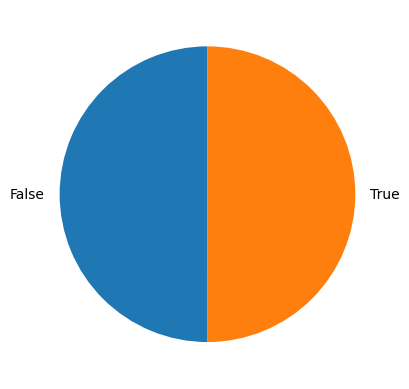

In [48]:
df_crop_clean['Fertilizer_Used'].value_counts().plot.pie(startangle = 90)
plt.ylabel('')

In [49]:
# 4.10 viewing distribution of irrigartion used
df_crop_clean['Irrigation_Used'].value_counts(dropna = False)

Irrigation_Used
False    500509
True     499491
Name: count, dtype: int64

Text(0, 0.5, '')

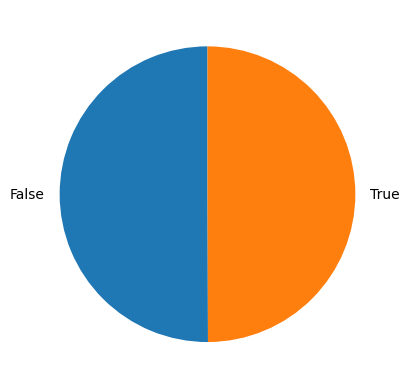

In [50]:
df_crop_clean['Irrigation_Used'].value_counts().plot.pie(startangle = 90)
plt.ylabel('')

## 5. Observations

Most of the columns are evenly distributed other than the yield. This tells me that the yield is the independent variable and through my analysis I will have to figure out what contributes the most and least to growth, or if it is a combination of the other variables.

In [88]:
df_crop_clean.shape

(1000000, 10)

## 6. Export Data

In [90]:
df_crop_clean.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'crop_yield_clean.pkl'))